# **FINAL_SUBMISSION**

**THE CHALLANGE**


Help find ways to improve the performance of machine learning and predictive models by filling in gaps in the datasets prior to model training.




ANATOMY OF THE CHALLANGE:


DO WHAT?

Improve performance of Machine Learning (ML) models by collecting a complete and continuous sensor data stream.

WHY DID IT HAPPEN?

*  Sensor issues or signal noise due to experimental environment/setup
*  Corrupted of data
*  Loss of data during transmission (also due to limited bandwidth of transmission)
*  Interference
*  Limited amount of power for data collection and transmission


WHAT IT DOES?

*  Limits the ability to train accurate ML models to predict features/characteristics in data, which in turn renders the data "useless"
*  Hinders the collection of good-quality data silos


HOW TO SOLVE/OBJECTIVE?

*  By "filling in" the missing datapoints in the datasets
*  By "generating" the missing datapoints in the datasets
*  By eliminating/removing the noisy/corrupted information that is embedded in individual datapoints



DO IT WHEN?

*  Prior to training, i.e. during data cleaning and preprocessing.






We started by investigating the reasons behind data loss when the data is acquired through a sensor or sensor array. In addition, we also started doing research finding the reasons behind the loss.

Our research concluded that data loss in any dataset does not only occur due to missing data (be it discreet or continuous/timeseries) but also due to incomplete or corrupted or noisy collection of these data that are acquired by the sensors due to the reasons mentioned above.



---



HYPOTHESIS:



We propose an end-to-end Machine learning pipeline to -fill in the missing data using Generative modeling which involves using a model to generate new examples that plausibly come from an existing distribution of samples.

Stacked Denoising Autoencoder for when the sensor data is corrupted or there is a bit of noise in it, we call this type of data noisy data.
To obtain proper information about the data, we want Denoising.
We define our autoencoder to remove (if not all)most of the noise our data.

Transforms the input into a lower dimensional representation, and a decoder, which tries to reconstruct the original input from the lower dimensional representation. Therefore, these models present some some sort of “bottle neck” in the middle that forces the network to learn how to compress the data in a lower dimensional space. When training these algorithms, the objective is to be able to reconstruct the original input with the minimum amount of information loss. Once the model is trained, we can compress data at will by only using the encoder component of the autoencoder.


---
**(A)**

DETAILS:
One model is called the “generator” or “generative network” model that learns to generate new plausible samples. The other model is called the “discriminator” or “discriminative network” and learns to differentiate generated examples from real examples.

The two models are set up in a contest or a game (in a game theory sense) where the generator model seeks to fool the discriminator model, and the discriminator is provided with both examples of real and generated samples.

After training, the generative model can then be used to create new plausible samples on demand.

----


**(B)**

An autoencoder is a neural network used for dimensionality reduction; that is, for feature selection and extraction. Autoencoders with more hidden layers than inputs run the risk of learning the identity function – where the output simply equals the input – thereby becoming useless.

Denoising autoencoders are an extension of the basic autoencoder, and represent a stochastic version of it. Denoising autoencoders attempt to address identity-function risk by randomly corrupting input (i.e. introducing noise) that the autoencoder must then reconstruct, or denoise.

Stacked Denoising Autoencoder

A stacked denoising autoencoder is simply many denoising autoencoders strung together.

A key function of SDAs, and deep learning more generally, is unsupervised pre-training, layer by layer, as input is fed through. Once each layer is pre-trained to conduct feature selection and extraction on the input from the preceding layer, a second stage of supervised fine-tuning can follow.

A word on stochastic corruption in SDAs: Denoising autoencoders shuffle data around and learn about that data by attempting to reconstruct it. The act of shuffling is the noise, and the job of the network is to recognize the features within the noise that will allow it to classify the input. When a network is being trained, it generates a model, and measures the distance between that model and the benchmark through a loss function. Its attempts to minimize the loss function involve resampling the shuffled inputs and re-reconstructing the data, until it finds those inputs which bring its model closest to what it has been told is true.

---

**(C)**

Encoder network: It translates the original high-dimension input into the latent low-dimensional code. The input size is larger than the output size.
Decoder network: The decoder network recovers the data from the code, likely with larger and larger output layers.

The encoder network essentially accomplishes the dimensionality reduction, just like how we would use Principal Component Analysis (PCA) or Matrix Factorization (MF) for. In addition, the autoencoder is explicitly optimized for the data reconstruction from the code.



---

**(D)**

Disentangled Variational autoencoders

The idea of Variational Autoencoder  is actually less similar to all the autoencoder models above, but deeply rooted in the methods of variational bayesian and graphical model.
Instead of mapping the input into a fixed vector, we want to map it into a distribution.
If each variable in the inferred latent representation is only sensitive to one single generative factor and relatively invariant to other factors, we will say this representation is disentangled or factorized. One benefit that often comes with disentangled representation is good interpretability and easy generalization to a variety of tasks.

For example, a model trained on photos of human faces might capture the gentle, skin color, hair color, hair length, emotion, whether wearing a pair of glasses and many other relatively independent factors in separate dimensions. Such a disentangled representation is very beneficial to facial image generation.


https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html#beta-vae




# **Download NASA Satellite Images of the Earth (NASA MODIS)**

This function can download an entire history of any NASA image dataset that follow the GIBS RESTful API pattern of calls

**Sample call**: https://gibs.earthdata.nasa.gov/wmts/epsg4326/best/MODIS_Terra_CorrectedReflectance_TrueColor/default/2012-07-09/250m/6/13/36.jpg

**Pattern**: https://gibs.earthdata.nasa.gov/wmts/epsg{EPSG:Code}/best/{ProductName}/default/{Time}/{TileMatrixSet}/{ZoomLevel}/{TileRow}/{TileCol}.png

**GIBS API webpage**: https://wiki.earthdata.nasa.gov/display/GIBS/GIBS+API+for+Developers


In [0]:
import requests
import shutil
import os
 
"""
This function can download an entire history of any NASA image dataset that follow the GIBS RESTful API pattern of calls

Sample call: https://gibs.earthdata.nasa.gov/wmts/epsg4326/best/MODIS_Terra_CorrectedReflectance_TrueColor/default/2012-07-09/250m/6/13/36.jpg

Pattern: https://gibs.earthdata.nasa.gov/wmts/epsg{EPSG:Code}/best/{ProductName}/default/{Time}/{TileMatrixSet}/{ZoomLevel}/{TileRow}/{TileCol}.png

"""

def download_MODIS_image(num_images, year, month, day, max_day, max_month, end_date):
    
    # input parameters
    # num_images: number of images to download (for this URL, don't go over 80)
    # year: year when image was taken; e.g. 2019
    # month: month when image was taken; e.g. 7
    # day: day when image was taken; e.g. 12
    # max_day: day of each month on which you want to stop and move on to the next month; e.g. 30
    # max_month: month of each year on which you want to stop and move on to the next year; e.g. 12
    # end_date: a data (string) on which you want to break the loop; e.g. ''2019-10-20
    
    if month < 10 and day < 10:
        date = str(year) + '-0' + str(month) + '-0' + str(day)
    elif month < 10 and day >= 10:
        date = str(year) + '-0' + str(month) + '-' + str(day)
    elif month >= 10 and day < 10:
    elif month >= 10 and day < 10:
        date = str(year) + '-' + str(month) + '-0' + str(day)
    else:
        date = str(year) + '-' + str(month) + '-' + str(day)
        
    
    #max_day = 30   # not going to take the data from 31st day of any month (future imoprovement)
    #max_month = 12
    
    image_num = 0
    
    for m in range(month, max_month+1):
        for d in range(day, max_day+1):            
            for i in range(num_images):
                
                if date == end_date:
                    print('end date','end_date', ' reached')
                    break            
                image_id = i
                #image_num = str(img_counter)
                url = 'https://gibs.earthdata.nasa.gov/wmts/epsg4326/best/MODIS_Terra_CorrectedReflectance_TrueColor/default/' + date + '/250m/6/13/' + str(image_id) + '.jpg'
                
                #Save file in local hard drive
                filepath = 'D:\SpaceApps2019\Chasers_of_lost_data\downloads\images_modis_nasa\\'
                filename = 'nasa_modis_image_' + date + '_' + str(image_num) + '.jpg'
                full_filepath = filepath + filename
                
                # Open the url image, set stream to True, this will return the stream content.
                response = requests.get(url, stream=True)
                    
                # Open a local file with wb ( write binary ) permission.
                local_file = open(full_filepath, 'wb')
                
                # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
                response.raw.decode_content = True
                
                # Copy the response stream raw data to local image file.
                shutil.copyfileobj(response.raw, local_file)
                
                # Remove the image url response object.
                local_file.close()
                del response
                
                filesize = os.path.getsize(full_filepath)
                if filesize > 428:
                    print('image #', 'image_num', 'downloaded')
                else:
                    print('image #','image_num', 'is a zero sized file --> invalid image')
                    
                image_num += 1
            

#### MAIN ####

# Loop over dates in a month to download in larger batches
#num_images = 80
#day = 1
#month = 7
#year = 2019
#max_day = 30
#max_month = 9
#end_date = '2019-09-15'

#download_MODIS_image(num_images, year, month, day, max_day, max_month, end_date)
            



# **Image Completion with Deep Learning in TensorFlow**
Content-aware fill is a powerful tool designers and photographers use to fill in unwanted or missing parts of images. Image completion and inpainting are closely related technologies used to fill in missing or corrupted parts of images. There are many ways to do content-aware fill, image completion, and inpainting. 

We use Semantic Image Inpainting with Deep Generative Models

"Semantic image inpainting is a challenging task where large missing regions have to be filled based on the available visual data. Existing methods which extract information from only a single image generally produce unsatisfactory results due to the lack of high level context. In this paper, we propose a novel method for semantic image inpainting, which generates the missing content by conditioning on the available data. Given a trained generative model, we search for the closest encoding of the corrupted image in the latent image manifold using our context and prior losses. This encoding is then passed through the generative model to infer the missing content. In our method, inference is possible irrespective of how the missing content is structured, while the state-of-the-art learning based method requires specific information about the holes in the training phase. Experiments  show that the method successfully predicts information in large missing regions and achieves pixel-level photorealism, significantly outperforming the state-of-the-art methods." 



---



---



---



---



---



---



---



---



---



---



# **Proof of Concept #1**

# **Filling up missing portions of NASA earth images with **

# **# Algorithm: Deep Convolutional Generative Adversarial Network (DCGAN)**

This is a modified version of a DCGAN tutorial that was originally developed to generate fake MNIST images. **We have modified the code to take a single, corrupted NASA earth image as input and repair it.**

The code is written using the [Keras Sequential API](https://www.tensorflow.org/guide/keras) with a `tf.GradientTape` training loop.

## What are GANs?
[Generative Adversarial Networks](https://arxiv.org/abs/1406.2661) (GANs) are one of the most interesting ideas in computer science today. Two models are trained simultaneously by an adversarial process. A *generator* ("the artist") learns to create images that look real, while a *discriminator* ("the art critic") learns to tell real images apart from fakes.

![A diagram of a generator and discriminator](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/gan1.png?raw=1)

During training, the *generator* progressively becomes better at creating images that look real, while the *discriminator* becomes better at telling them apart. The process reaches equilibrium when the *discriminator* can no longer distinguish real images from fakes.

![A second diagram of a generator and discriminator](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/gan2.png?raw=1)

### Import TensorFlow and other libraries

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'1.15.0-rc3'

In [0]:
# To generate GIFs
!pip install imageio

In [0]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

### Load and prepare the dataset

You will use the MNIST dataset to train the generator and the discriminator. The generator will generate handwritten digits resembling the MNIST data.

In [0]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [0]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [0]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [0]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Create the models

Both the generator and discriminator are defined using the [Keras Sequential API](https://www.tensorflow.org/guide/keras#sequential_model).

### The Generator

The generator uses `tf.keras.layers.Conv2DTranspose` (upsampling) layers to produce an image from a seed (random noise). It starts with a **`Dense` layer that takes this seed as input**, then **upsamples it several times until it reaches the desired image size** of 28x28x1. Notice the `tf.keras.layers.LeakyReLU` activation for each layer, except the output layer which uses tanh.

In [0]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

Use the (as yet untrained) generator to create an image.

In [0]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

### The Discriminator

The discriminator is a CNN-based image classifier.

In [0]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.

In [0]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

## Define the loss and optimizers

Define loss functions and optimizers for both models.


In [0]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### Discriminator loss

This method quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [0]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### Generator loss
The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, we will compare the discriminators decisions on the generated images to an array of 1s.

In [0]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since we will train two networks separately.

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Save checkpoints
Save and restore models, which can be helpful in case a long running training task is interrupted.

In [0]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Define the training loop



In [0]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [0]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

**Generate and save images**



In [0]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

## Train the model
Call the `train()` method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated images look like random noise. As training progresses, the generated digits will look increasingly real. After about 50 epochs, they resemble MNIST digits. This may take about one minute / epoch with the default settings on Colab.

In [0]:
%%time
train(train_dataset, EPOCHS)

Restore the latest checkpoint.

In [0]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## Create a GIF


In [0]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [0]:
display_image(EPOCHS)



---



---



---



---



---



---



---



---



---



---



# **Proof of Concept #2**

# **Cleaning up noisy/missing data from NASA datasets**

# **# Algorithm: Denoising Autoencoder**

**Denoising_autoencoders_NASA_earth_data**


https://colab.research.google.com/drive/1Sj_J9yKrNXkFQCBMcZAqF03MOJqUIt_N#forceEdit=true&sandboxMode=true


https://colab.research.google.com/drive/1Sj_J9yKrNXkFQCBMcZAqF03MOJqUIt_N

https://github.com/pilillo/img-notebooks

https://github.com/pilillo/img-notebooks/blob/master/Denoising_autoencoders.ipynb

In [0]:
!pwd

/content


In [0]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
!ls

 28x28-nasa-earth-images_bad   'Copy of Denoising_autoencoders.ipynb'
 28x28-nasa-earth-images_good   dcgan_tutorial_nasa.ipynb
 56x56-nasa-earth-bad-images    Denoising_autoencoders.ipynb
 56x56-nasa-earth-images        nasa_modis_image_2019-03-016_lowres5.jpg
'Copy of Copy of dcgan.ipynb'


In [0]:
# mount google drive location where you saved a .zip archive of your folder that contains images; then unzip the file

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# get RGB images from Google drive and store them as numpy array

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import glob
import math
import cv2

#filelist = glob.glob('Bulk/*.jpg')
#good_im = np.array([np.array(Image.open(fname).convert('LA')) for fname in filelist])   # Already converts to grayscale but has an extra dummy layer



In [0]:
filelist = glob.glob('Bulk/*.jpg')
data = []
for file in filelist:
    img = cv2.imread(file)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    data.append(img_gray)

In [0]:
np.shape(data)

(2073, 28, 28)

In [0]:
data_array = np.array(data)
data_array.shape, type(data_array)

((2073, 28, 28), numpy.ndarray)

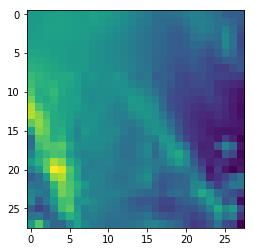

In [0]:
plt.imshow(data_array[56,:,:])

In [0]:
# split the batch into training and test set: 80-20 partition

batch_size = len(data_array[:,0,0])
train_size = int(math.ceil(batch_size*0.8))
test_size = batch_size - train_size

x_train = data_array[0:train_size,:,:]
x_test = data_array[train_size:,:,:]


In [0]:
train_size, test_size

(1659, 414)

In [0]:
x_train.shape, x_test.shape

((1659, 28, 28), (414, 28, 28))

('x_train shape:', (1659, 28, 28))
(1659, 'train samples')
(414, 'test samples')


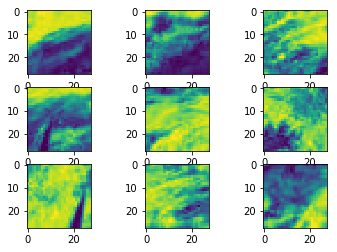

In [0]:
%matplotlib inline

import keras
#from keras.datasets import cifar10
#from keras.datasets import mnist

from matplotlib import pyplot
from matplotlib.pyplot import imshow
import numpy as np


# https://keras.io/datasets/#mnist-database-of-handwritten-digits
# load mnist in a grayscale format bunch of images
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    imshow(x_train[i])
    imgplot = pyplot.imshow(x_train[i])

training set shape is (1659, 28, 28)
First image in the training set


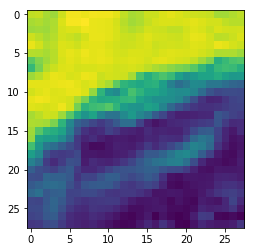

In [0]:
print "training set shape is", x_train.shape
#print y_train.shape

# since we deal with square images
image_size = x_train.shape[1]

# inspect the format of x and y
print "First image in the training set"
pyplot.imshow(x_train[0])

In [0]:
initial_seed = 1234
np.random.seed(initial_seed)

In [0]:
print np.amax(x_train)
# normalize the pixel values to have everything between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

255


In [0]:
# https://github.com/keras-team/keras/blob/master/examples/mnist_denoising_autoencoder.py
# https://blog.keras.io/building-autoencoders-in-keras.html
# x_train_ = np.reshape(x_train, [-1, image_size, image_size, 1])
x_train_ = np.reshape(x_train, (len(x_train), image_size, image_size, 1))
print "Reshaped train from", x_train.shape, "to", x_train_.shape

#x_test_ = np.reshape(x_test, [-1, image_size, image_size, 1])
x_test_ = np.reshape(x_test, (len(x_test), image_size, image_size, 1))
print "Reshaped test from", x_test.shape, "to", x_test_.shape

Reshaped train from (1659, 28, 28) to (1659, 28, 28, 1)
Reshaped test from (414, 28, 28) to (414, 28, 28, 1)


In [0]:
# Generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc=0.5,
                         scale=0.5,
                         size=x_train_.shape)
print "x_train noise.shape", noise.shape
x_train_noisy = x_train_ + noise
noise = np.random.normal(loc=0.5,
                         scale=0.5,
                         size=x_test_.shape)
x_test_noisy = x_test_ + noise
print "x_test noise.shape", noise.shape

# make sure the data are in the [0,1] range by clipping lower and higher ones
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.clip.html
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train noise.shape (1659, 28, 28, 1)
x_test noise.shape (414, 28, 28, 1)


Let's see how noisy became the first training entry after adding the noise:

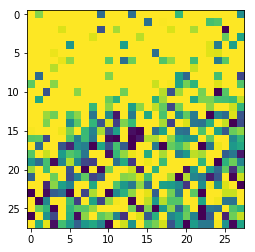

In [0]:
pyplot.imshow(
    np.reshape(x_train_noisy[0], (1, image_size, image_size))[0]
)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, rmsprop
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

model = Sequential()
model.add(Conv2D(16, (3, 3), 
                 input_shape=x_train_.shape[1:], # (28, 28)
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding="same"))

# ** encoded representation **
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
          
model.compile(optimizer='adadelta', loss='binary_crossentropy')

W1020 19:09:57.593410 140400888121216 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1020 19:09:57.604981 140400888121216 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1020 19:09:57.615333 140400888121216 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1020 19:09:57.662156 140400888121216 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1020 19:09:57.707104 140400888121216 module_wrapper.py:139] From /usr/loca

In [0]:
model.fit(x_train_noisy, 
          x_train_,
          epochs=250,
          batch_size=128,
          shuffle=True,
          validation_data=(x_test_noisy, x_test_))

Train on 1659 samples, validate on 414 samples
Epoch 1/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6399 - val_loss: 0.6594
Epoch 2/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6438 - val_loss: 0.6752
Epoch 3/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6429 - val_loss: 0.6310
Epoch 4/250
1659/1659 [==============================] - 2s 2ms/step - loss: 0.6490 - val_loss: 0.6695
Epoch 5/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6558 - val_loss: 0.6406
Epoch 6/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6477 - val_loss: 0.6716
Epoch 7/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6398 - val_loss: 0.6397
Epoch 8/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6358 - val_loss: 0.6337
Epoch 9/250
1659/1659 [==============================] - 2s 1ms/step - loss: 0.6713 - val_loss: 0.6310
Epoch 10/250
1659/1659 [==

In [0]:
# example prediction on the corrupted test images
decoded = model.predict(
    # only predict the first element as example
    np.reshape(x_test_noisy[0], (1, image_size, image_size, 1))
)

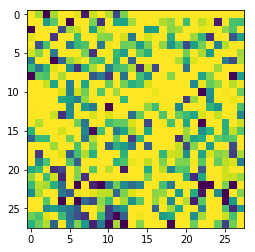

In [0]:
pyplot.imshow(
    np.reshape(x_test_noisy[0], (1, image_size, image_size))[0]
)

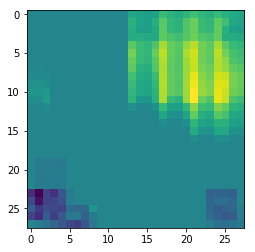

In [0]:
pyplot.imshow(
    np.reshape(decoded, (1, image_size, image_size))[0]
)



---



---



---



---



---



---



---



---



---



---



# **Proof of Concept #3**

# **NASA Meteorite Landing dataset: Recovering/approximating/imputing missing values**

# **# Algorithm: Deep Convolutional Generative Adversarial Network (DCGAN)**

# **Our approach**

Here, we are transorming each sample (row) of the Meteorite CSV dataset into an image. The dataset has 45716 rows and 9 columns, including metorites' names and IDs. Our algorithm transforms each row it into a 3x3 image and zero pads the outer periphery of the 3x3 matrix (to make it a 7x7 matrix) so that each row fits into a 2D Convolutional filter. Then, once the training and evaluation is complete, we plan to recover the original data (CSV) from the images generated by the DCGAN.

# **Challenges**

There are mainly 2 challenges that we faced (#1 and #2) while implementing this demo. #3 is our planned future work.



1.   The dataset is probably not big enough for a regular Convolutional Neural Network (CNN)-based DCGAN architecture.
2.   We had to encode all categorical values to numeric values, including the names. The problem here was our label encoder generated different numeric values for the meteorite names compared to their IDs. We chose not to exclude these two columns from the dataset for the sake of architectural simplicity at this moment.


# **Future work**
Due to time constraints, we are yet to recover the generated csv data from the output images and evaluate whether the algorithm converged or not. If it did not converge, then we plan to tune the hyperparameters, modify the CNN architecture if necessary and re-train the DCGAN algorithm.


### Import TensorFlow and other libraries

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
# To generate GIFs
!pip install imageio

In [0]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import time
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from IPython import display

### Load and prepare NASA Meteorite dataset for **training**

In [2]:
##### Initialize training dataset #####

# mount google drive location where you saved a .zip archive of your folder that contains images; then unzip the file
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive/Colab\ Notebooks/NASA-challenge-sample-datasets/

/content/drive/My Drive/Colab Notebooks/NASA-challenge-sample-datasets


**Load dataset and encode categorical values**

In [0]:
# Load dataset and encode categorical values
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NASA-challenge-sample-datasets/Meteorite_Landings_clean.csv')
df_filled = df.fillna(0)

# Encode categorical values
label_enc = preprocessing.LabelEncoder()
data_clean = df_filled.apply(lambda series: pd.Series(label_enc.fit_transform(series), index=series.index))
#data_clean.to_csv('Meteorite_not_normalized.csv',index=True)

# Normalize numeric data only (range: 0-255)
first_2_col = data_clean[data_clean.columns[:2]]
minmax = MinMaxScaler(feature_range=(0, 255), copy=True)
data_norm_minmax = minmax.fit_transform(data_clean[['nametype', 'recclass', 'mass (g)', 'fall', 'year_numeric', 'reclat', 'reclong']])

#data_norm = normalize(data_clean[['nametype', 'recclass', 'mass (g)', 'fall', 'year_numeric', 'reclat', 'reclong']])

dataset_complete = np.hstack((first_2_col, data_norm_minmax))
#np.savetxt("Meteorite_clean_minmax.csv", dataset_complete, delimiter=",")


**Start zero padding the data so that it fits into a 2D Convolutional filter**

In [0]:
## Start zero padding the data so that it fits into a 2D Convolutional filter
zeros_vert = np.zeros((3, 2))
zeros_hori = np.zeros((2, 7))
zeros_vert.shape, zeros_hori.shape, dataset_complete.shape

((3, 2), (2, 7), (45716, 9))

In [0]:
# Rehsape data and pad zeros to increase dimensionality
dataset_intermed = dataset_complete.reshape(dataset_complete.shape[0], 3, 3).astype('float32')
dataset_intermed.shape

(45716, 3, 3)

In [0]:
# Pad zeros horizontally
dataset_hor_pad = []
for i in range(dataset_intermed.shape[0]):
  dataset_hor_pad_1 = np.hstack((zeros_vert, dataset_intermed[i,:,:], zeros_vert))
  dataset_hor_pad.append(dataset_hor_pad_1)

dataset_hor_pad = np.array(dataset_hor_pad)
dataset_hor_pad_1.shape, dataset_hor_pad.shape

((3, 7), (45716, 3, 7))

In [0]:
# Pad zeros vertically
dataset_ver_pad = []
for i in range(dataset_hor_pad.shape[0]):
  dataset_ver_pad_1 = np.vstack((zeros_hori, dataset_hor_pad[i,:,:], zeros_hori))
  dataset_ver_pad.append(dataset_ver_pad_1)

dataset_padded = np.array(dataset_ver_pad)
dataset_ver_pad_1.shape, dataset_padded.shape

((7, 7), (45716, 7, 7))

In [0]:
dataset_padded[1111,:,:]

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   2.        ,   2.        ,
        255.        ,   0.        ,   0.        ],
       [  0.        ,   0.        , 100.90322876, 157.19761658,
        255.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  80.52631378, 190.19392395,
          9.96379566,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]])

**Reshape training data, define batch and buffer sizes**

In [0]:
# Reshape training data, define batch and buffer sizes
dataset = dataset_padded.reshape(dataset_padded.shape[0], 7, 7, 1).astype('float32')

# Initialize buffer and batch size
BUFFER_SIZE = dataset_padded.shape[0]
BATCH_SIZE = 256

# BATCH and SHUFFLE the data
train_dataset = tf.data.Dataset.from_tensor_slices(dataset).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [0]:
dataset.shape

(45716, 7, 7, 1)

## Create the models

Both the generator and discriminator are defined using the [Keras Sequential API](https://www.tensorflow.org/guide/keras#sequential_model).

### The Generator

The generator uses `tf.keras.layers.Conv2DTranspose` (upsampling) layers to produce an image from a seed (random noise). It starts with a **`Dense` layer that takes this seed as input**, then **upsamples it several times until it reaches the desired image size** of 28x28x1. Notice the `tf.keras.layers.LeakyReLU` activation for each layer, except the output layer which uses tanh.

In [0]:
# Create generator

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 7, 7, 1)

    return model

**Use the (as yet untrained) generator to create an image.**

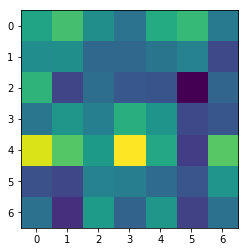

In [0]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])

### The Discriminator

The discriminator is a CNN-based image classifier.

In [0]:
# Create a discriminator to police the generator (notice the input shape of the first Conv2D layer)

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[7, 7, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

**Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.**

In [0]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00597883]], shape=(1, 1), dtype=float32)


## Define the loss and optimizers

Define loss functions and optimizers for both models.


In [0]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### Discriminator loss

This method quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [0]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### Generator loss
The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, we will compare the discriminators decisions on the generated images to an array of 1s.

In [0]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since we will train two networks separately.

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Save checkpoints
Save and restore models, which can be helpful in case a long running training task is interrupted.

In [0]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Define the training loop



In [0]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [0]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

**Generate and save images**



In [0]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)
  print('prediction shape = ', predictions.shape)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      #plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.imshow(predictions[i, :, :, 0])
      plt.axis('off')

  #plt.imshow(predictions[0, :, :, 0])
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

## Train the model
Call the `train()` method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated image tiles will look like random noise. As training progresses, the tiles will look increasingly real This is the expectation when enough training data i.e. images, is provided. Usually with only a few images as input, the discriminator doesn't get the oppooertunity to police the generator properly.

prediction shape =  (16, 7, 7, 1)
CPU times: user 2min 15s, sys: 18 s, total: 2min 33s
Wall time: 7min 39s


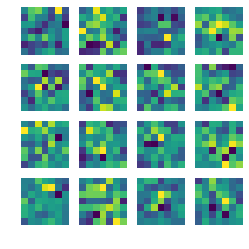

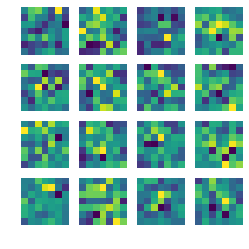

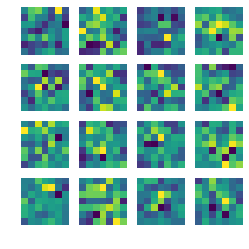

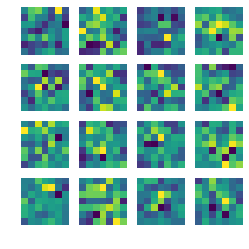

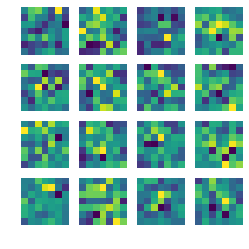

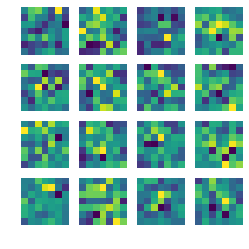

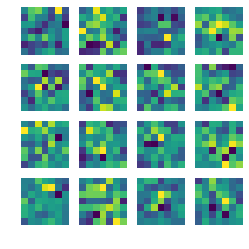

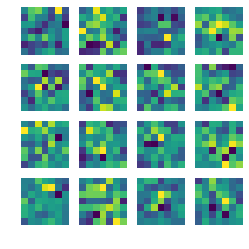

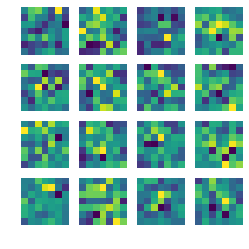

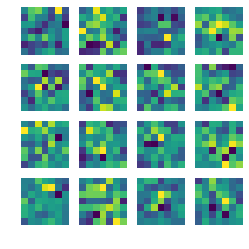

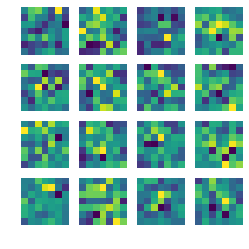

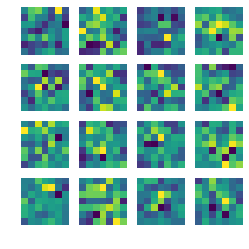

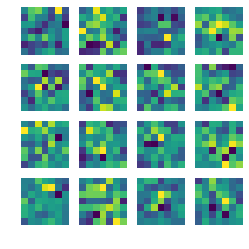

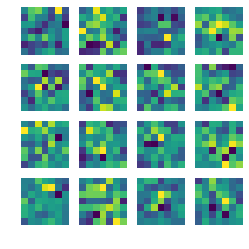

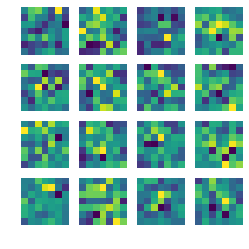

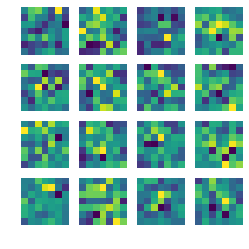

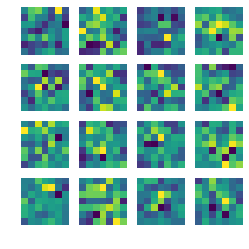

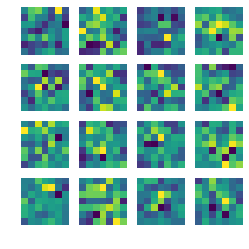

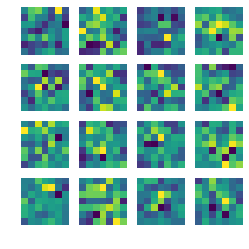

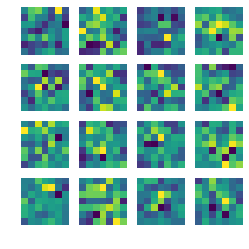

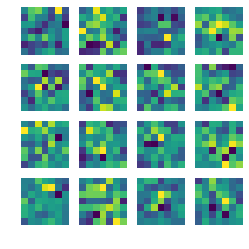

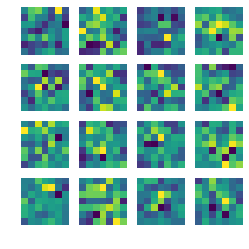

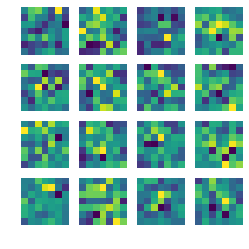

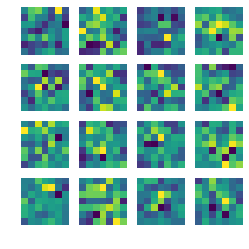

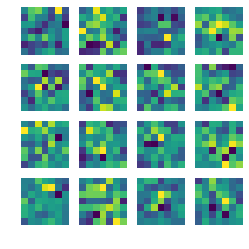

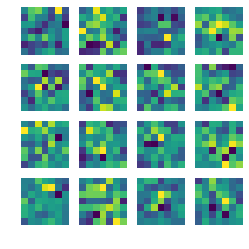

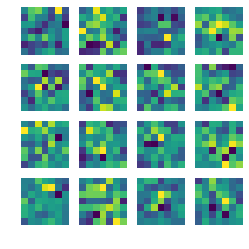

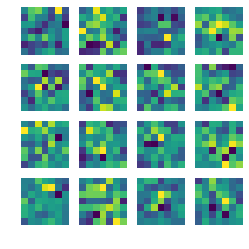

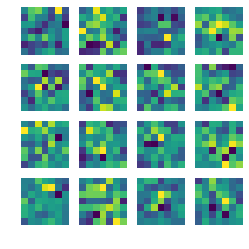

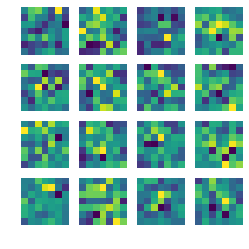

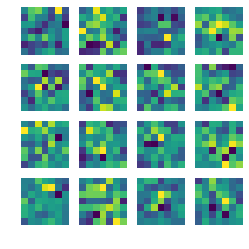

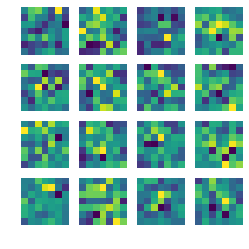

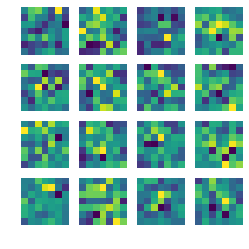

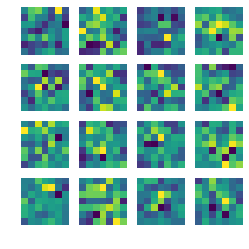

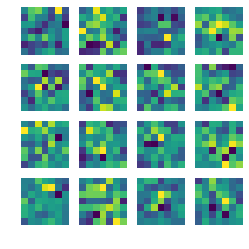

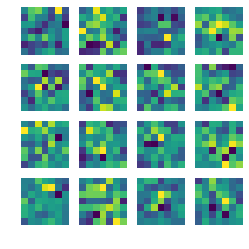

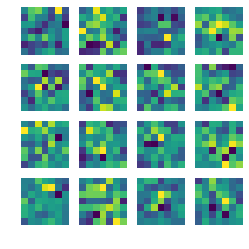

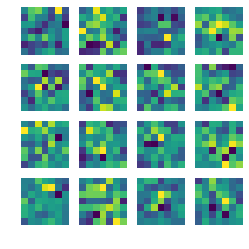

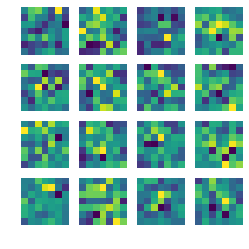

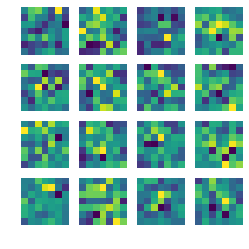

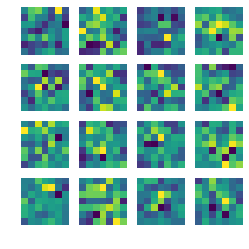

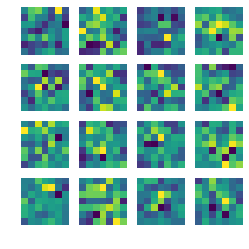

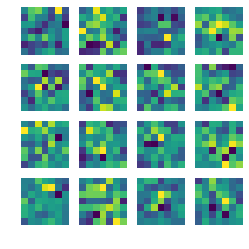

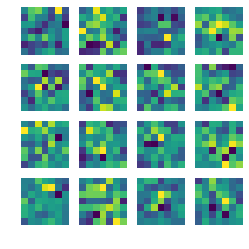

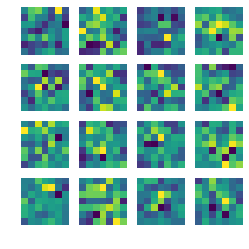

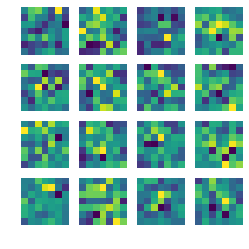

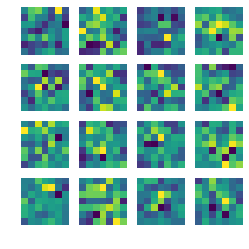

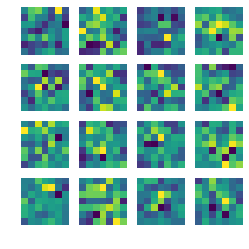

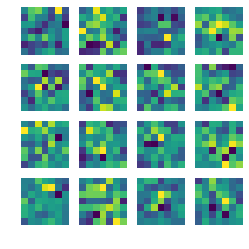

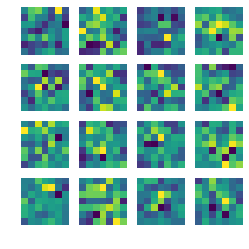

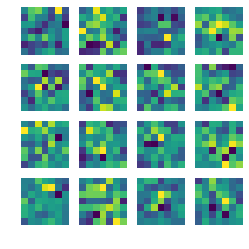

In [0]:
%%time
train(train_dataset, EPOCHS)

Restore the latest checkpoint.

In [0]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## Create a GIF


In [0]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [0]:
display_image(EPOCHS)

Use `imageio` to create an animated gif using the images saved during training.

In [0]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
  display.Image(filename=anim_file)

If you're working in Colab you can download the animation with the code below:

In [0]:
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(anim_file)



---



---



---



---



---



---



---



---



---



---



Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                50192     
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Sh

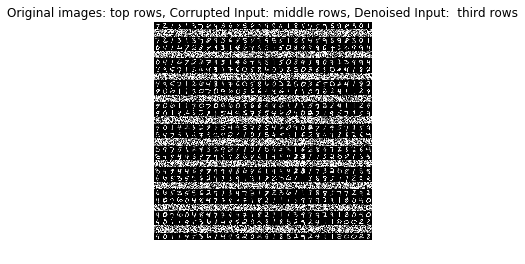

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

np.random.seed(1337)

# MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Network parameters
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
latent_dim = 16
# Encoder/Decoder number of CNN layers and filters per layer
layer_filters = [32, 64]

# Build the Autoencoder Model
# First build the Encoder Model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
# Stack of Conv2D blocks
# Notes:
# 1) Use Batch Normalization before ReLU on deep networks
# 2) Use MaxPooling2D as alternative to strides>1
# - faster but not as good as strides>1
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               activation='relu',
               padding='same')(x)

# Shape info needed to build Decoder Model
shape = K.int_shape(x)

# Generate the latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# Instantiate Encoder Model
encoder = Model(inputs, latent, name='encoder')
encoder.summary()

# Build the Decoder Model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

# Stack of Transposed Conv2D blocks
# Notes:
# 1) Use Batch Normalization before ReLU on deep networks
# 2) Use UpSampling2D as alternative to strides>1
# - faster but not as good as strides>1
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        strides=2,
                        activation='relu',
                        padding='same')(x)

x = Conv2DTranspose(filters=1,
                    kernel_size=kernel_size,
                    padding='same')(x)

outputs = Activation('sigmoid', name='decoder_output')(x)

# Instantiate Decoder Model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# Autoencoder = Encoder + Decoder
# Instantiate Autoencoder Model
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

autoencoder.compile(loss='mse', optimizer='adam')

# Train the autoencoder
autoencoder.fit(x_train_noisy,
                x_train,
                validation_data=(x_test_noisy, x_test),
                epochs=30,
                batch_size=batch_size)

# Predict the Autoencoder output from corrupted test images
x_decoded = autoencoder.predict(x_test_noisy)

# Display the 1st 8 corrupted and denoised images
rows, cols = 10, 30
num = rows * cols
imgs = np.concatenate([x_test[:num], x_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure()
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
Image.fromarray(imgs).save('corrupted_and_denoised.png')
plt.show()

All the other demos are examples of Supervised Learning, so in this demo is an example of Unsupervised Learning we train an autoencoder on MNIST digits.

An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). Sounds simple enough, except the network has a tight bottleneck of a few neurons in the middle (in the default example only two!), forcing it to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input

https://cs.stanford.edu/people/karpathy/convnetjs/demo/autoencoder.html

CITATIONS:



https://github.com/pilillo/img-notebooks/blob/master/Denoising_autoencoders.ipynb


https://paperswithcode.com/paper/high-throughput-onboard-hyperspectral-image

https://arxiv.org/abs/1607.07539

http://bamos.github.io/2016/08/09/deep-completion/#ml-heavy-tensorflow-implementation-of-image-completion-with-dcgans



# **Other similar algorithms as solutions to the missing data challenge**

# **RDCGAN: Unsupervised Representation Learning With Regularized Deep Convolutional Generative Adversarial Networks**

https://colab.research.google.com/drive/1xMdzSoZJXEvIKRxuzSCvDMjAkrweGPky

http://bamos.github.io/2016/08/09/deep-completion/#ml-heavy-tensorflow-implementation-of-image-completion-with-dcgans





---



---



---



# **ISR: Image Super Resolution**

# **# Demo of training**

In [0]:
!pip install ISR

     |████████████████████████████████| 17.3MB 19.2MB/s 
     |████████████████████████████████| 317kB 43.8MB/s 
     |████████████████████████████████| 92.5MB 272kB/s 
     |████████████████████████████████| 368kB 33.5MB/s 
     |████████████████████████████████| 3.2MB 32.2MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
     

# Train


## Get the training data
Get your data to train the model. The div2k dataset linked here is for a scaling factor of 2. Beware of this later when training the model.

(for more options on how to get you data on Colab notebooks visit https://colab.research.google.com/notebooks/io.ipynb)

In [0]:
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip

--2019-10-21 01:15:59--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip [following]
--2019-10-21 01:16:00--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 925390592 (883M) [application/zip]
Saving to: ‘DIV2K_train_LR_bicubic_X2.zip’

DIV2K_train_LR_bicu 100%[===================>] 882.52M  23.6MB/s    in 39s     

2019-10-21 01:16:39 (22.9 MB/s) - ‘DIV2K_train_LR_bicubic_X2.zip’ saved [925390592/925390592]

--2019-10-21 01:16:39--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X

In [0]:
!mkdir div2k
!unzip -q DIV2K_valid_LR_bicubic_X2.zip -d div2k
!unzip -q DIV2K_train_LR_bicubic_X2.zip -d div2k
!unzip -q DIV2K_train_HR.zip -d div2k
!unzip -q DIV2K_valid_HR.zip -d div2k

## Create the models
Import the models from the ISR package and create

- a RRDN super scaling network
- a discriminator network for GANs training
- a VGG19 feature extractor to train with a perceptual loss function

Carefully select
- 'x': this is the upscaling factor (2 by default)
- 'layers_to_extract': these are the layers from the VGG19 that will be used in the perceptual loss (leave the default if you're not familiar with it)
- 'lr_patch_size': this is the size of the patches that will be extracted from the LR images and fed to the ISR network during training time

Play around with the other architecture parameters

In [0]:
from ISR.models import RRDN
from ISR.models import Discriminator
from ISR.models import Cut_VGG19

Using TensorFlow backend.


In [0]:
lr_train_patch_size = 40
layers_to_extract = [5, 9]
scale = 2
hr_train_patch_size = lr_train_patch_size * scale

rrdn  = RRDN(arch_params={'C':4, 'D':3, 'G':64, 'G0':64, 'T':10, 'x':scale}, patch_size=lr_train_patch_size)
f_ext = Cut_VGG19(patch_size=hr_train_patch_size, layers_to_extract=layers_to_extract)
discr = Discriminator(patch_size=hr_train_patch_size, kernel_size=3)

Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 1s 0us/step


## Give the models to the Trainer
The Trainer object will combine the networks, manage your training data and keep you up-to-date with the training progress through Tensorboard and the command line.

Here we do not use  the pixel-wise MSE but only the perceptual loss by specifying the respective weights in `loss_weights`

In [0]:
from ISR.train import Trainer
loss_weights = {
  'generator': 0.0,
  'feature_extractor': 0.0833,
  'discriminator': 0.01
}
losses = {
  'generator': 'mae',
  'feature_extractor': 'mse',
  'discriminator': 'binary_crossentropy'
} 

log_dirs = {'logs': './logs', 'weights': './weights'}

learning_rate = {'initial_value': 0.0004, 'decay_factor': 0.5, 'decay_frequency': 30}

flatness = {'min': 0.0, 'max': 0.15, 'increase': 0.01, 'increase_frequency': 5}

trainer = Trainer(
    generator=rrdn,
    discriminator=discr,
    feature_extractor=f_ext,
    lr_train_dir='div2k/DIV2K_train_LR_bicubic/X2/',
    hr_train_dir='div2k/DIV2K_train_HR/',
    lr_valid_dir='div2k/DIV2K_train_LR_bicubic/X2/',
    hr_valid_dir='div2k/DIV2K_train_HR/',
    loss_weights=loss_weights,
    learning_rate=learning_rate,
    flatness=flatness,
    dataname='div2k',
    log_dirs=log_dirs,
    weights_generator=None,
    weights_discriminator=None,
    n_validation=40,
)


Choose epoch number, steps and batch size and start training

In [0]:
trainer.train(
    epochs=1,
    steps_per_epoch=20,
    batch_size=4,
    monitored_metrics={'val_PSNR_Y': 'max'}
)


Training details:
  training_parameters: 
    metrics: {'generator': <function PSNR_Y at 0x7f040778da60>}
    losses: {'generator': 'mae', 'discriminator': 'binary_crossentropy', 'feature_extractor': 'mse'}
    adam_optimizer: {'beta1': 0.9, 'beta2': 0.999, 'epsilon': None}
    learning_rate: {'initial_value': 0.0004, 'decay_factor': 0.5, 'decay_frequency': 30}
    flatness: {'min': 0.0, 'max': 0.15, 'increase': 0.01, 'increase_frequency': 5}
    n_validation: 40
    dataname: div2k
    fallback_save_every_n_epochs: 2
    log_dirs: {'logs': './logs', 'weights': './weights'}
    loss_weights: {'generator': 0.0, 'feature_extractor': 0.0833, 'discriminator': 0.01}
    hr_valid_dir: div2k/DIV2K_train_HR/
    lr_valid_dir: div2k/DIV2K_train_LR_bicubic/X2/
    hr_train_dir: div2k/DIV2K_train_HR/
    lr_train_dir: div2k/DIV2K_train_LR_bicubic/X2/
    lr_patch_size: 40
    steps_per_epoch: 20
    batch_size: 4
    starting_epoch: 0
  generator: 
    name: rrdn
    parameters: {'C': 4, 'D': 3,

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
100%|██████████| 20/20 [13:49<00:00, 39.44s/it]
Epoch 0 took      829.9s


160/160 [==============================] - 316s 2s/step


val_PSNR_Y is NOT among the model metrics, removing it.
{'val_loss': 0.9829644300043583, 'val_generator_loss': 0.40370433069765566, 'val_discriminator_loss': 0.6998646706342697, 'val_feature_extractor_loss': 19.83274558186531, 'val_generator_PSNR_Y': 8.570307517051697, 'train_d_real_loss': 0.09677358, 'train_d_real_acc': 1.0, 'train_d_fake_loss': 0.30542096, 'train_d_fake_acc': 0.815625, 'train_loss': 0.3081001, 'train_generator_loss': 0.83961016, 'train_discriminator_loss': 4.408768, 'train_feature_extractor_loss': 5.180871, 'train_generator_PSNR_Y': 2.7880409}
